In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

In [ ]:
! unzip fruit-images-for-object-detection.zip

Archive:  fruit-images-for-object-detection.zip
  inflating: test_zip/test/apple_77.jpg  
  inflating: test_zip/test/apple_77.xml  
  inflating: test_zip/test/apple_78.jpg  
  inflating: test_zip/test/apple_78.xml  
  inflating: test_zip/test/apple_79.jpg  
  inflating: test_zip/test/apple_79.xml  
  inflating: test_zip/test/apple_80.jpg  
  inflating: test_zip/test/apple_80.xml  
  inflating: test_zip/test/apple_81.jpg  
  inflating: test_zip/test/apple_81.xml  
  inflating: test_zip/test/apple_82.jpg  
  inflating: test_zip/test/apple_82.xml  
  inflating: test_zip/test/apple_83.jpg  
  inflating: test_zip/test/apple_83.xml  
  inflating: test_zip/test/apple_84.jpg  
  inflating: test_zip/test/apple_84.xml  
  inflating: test_zip/test/apple_85.jpg  
  inflating: test_zip/test/apple_85.xml  
  inflating: test_zip/test/apple_86.jpg  
  inflating: test_zip/test/apple_86.xml  
  inflating: test_zip/test/apple_87.jpg  
  inflating: test_zip/test/apple_87.xml  
  inflating: test_zip/test/a

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import os

In [ ]:
train_images = []
train_labels = []
shape = (128,128)
train_path = '/content/train_zip/train'
for filename in os.listdir('/content/train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        train_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        train_images.append(img)
train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)
test_images = []
test_labels = []
shape = (128,128)
test_path = '/content/test_zip/test'
for filename in os.listdir('/content/test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        test_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        test_images.append(img)
test_images = np.array(test_images)

In [ ]:
print("x train shape :",x_train.shape)
print("x val shape :",x_val.shape)
print("y train shape :",y_train.shape)
print("y val shape :",y_val.shape)

x train shape : (180, 128, 128, 3)
x val shape : (60, 128, 128, 3)
y train shape : (180, 4)
y val shape : (60, 4)


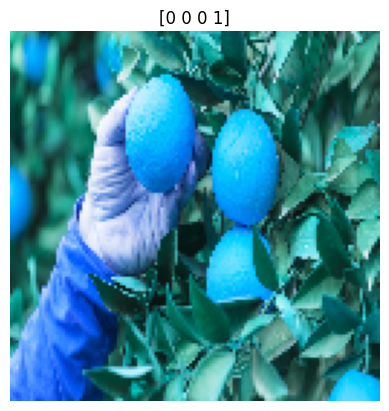

In [ ]:
img=x_train[50]
plt.imshow(img)
plt.title(y_train[50])
plt.axis("off")
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu",input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(206,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(103,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(4,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 30)        8130      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 30)        0

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
x_train=x_train/255.0
x_val=x_val/255.0

In [ ]:
hist=model.fit(x_train,y_train,batch_size=50,epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
4/4 [==============================] - 10s 463ms/step - loss: 1.3449 - accuracy: 0.2778 - val_loss: 1.3146 - val_accuracy: 0.3167
Epoch 2/100
4/4 [==============================] - 0s 33ms/step - loss: 1.3334 - accuracy: 0.3444 - val_loss: 1.3381 - val_accuracy: 0.2167
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: 1.2967 - accuracy: 0.3500 - val_loss: 1.2708 - val_accuracy: 0.4000
Epoch 4/100
4/4 [==============================] - 0s 30ms/step - loss: 1.2671 - accuracy: 0.4056 - val_loss: 1.2524 - val_accuracy: 0.7167
Epoch 5/100
4/4 [==============================] - 0s 29ms/step - loss: 1.2237 - accuracy: 0.4389 - val_loss: 1.2400 - val_accuracy: 0.4833
Epoch 6/100
4/4 [==============================] - 0s 29ms/step - loss: 1.1705 - accuracy: 0.5500 - val_loss: 1.0803 - val_accuracy: 0.7333
Epoch 7/100
4/4 [==============================] - 0s 29ms/step - loss: 0.9975 - accuracy: 0.6833 - val_loss: 0.9016 - val_accuracy: 0.7833
Epoch 8/100
4/4 [=

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


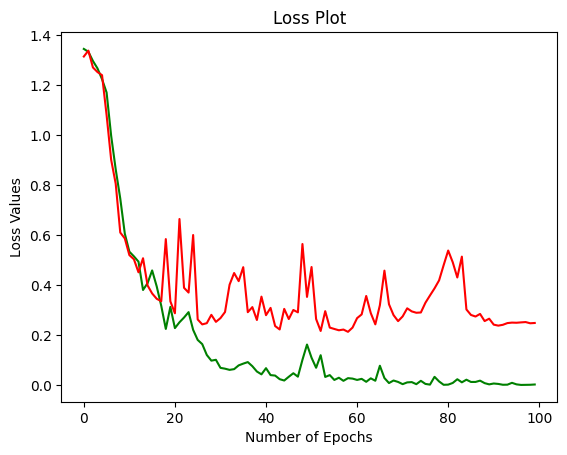

In [ ]:
plt.plot(hist.history["loss"],color="green",label="Train Loss")
plt.plot(hist.history["val_loss"],color="red",label="Validation Loss")
plt.title("Loss Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Values")
plt.show()

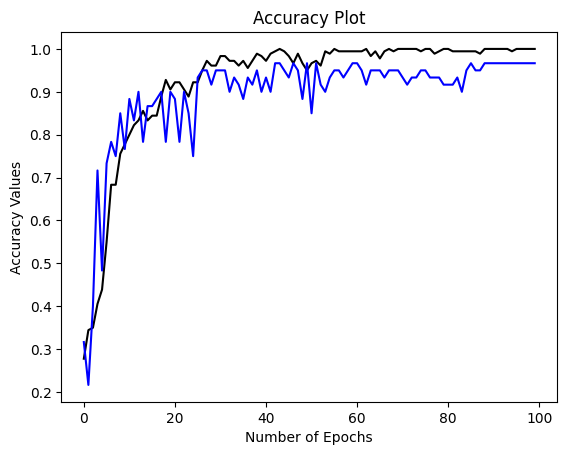

In [ ]:
plt.plot(hist.history["accuracy"],color="black",label="Train Accuracy")
plt.plot(hist.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Values")
plt.show()

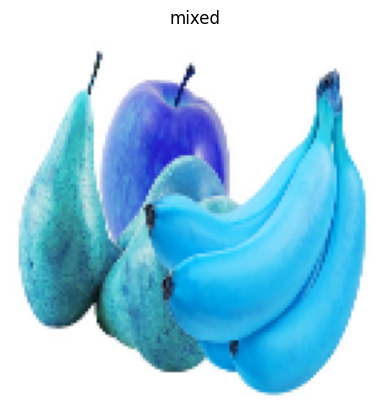

In [ ]:
test_img=test_images[25]
plt.imshow(test_img)
plt.title(test_labels[25])
plt.axis("off")
plt.show()

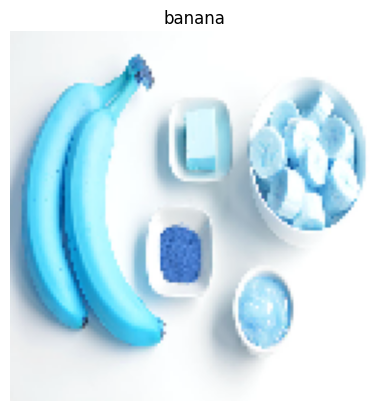

In [ ]:
test_img=test_images[10]
plt.imshow(test_img)
plt.title(test_labels[10])
plt.axis("off")
plt.show()

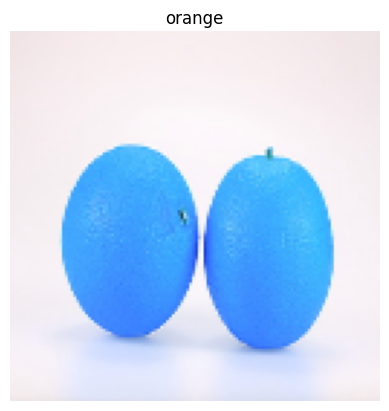

In [ ]:
test_img=test_images[50]
plt.imshow(test_img)
plt.title(test_labels[50])
plt.axis("off")
plt.show()